<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercícios-Obrigatórios" data-toc-modified-id="Exercícios-Obrigatórios-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercícios Obrigatórios</a></span><ul class="toc-item"><li><span><a href="#warmUpExercise()" data-toc-modified-id="warmUpExercise()-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>warmUpExercise()</a></span></li><li><span><a href="#plotData(X,-y)" data-toc-modified-id="plotData(X,-y)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>plotData(X, y)</a></span></li><li><span><a href="#computeCost(X,-y,-theta)" data-toc-modified-id="computeCost(X,-y,-theta)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>computeCost(X, y, theta)</a></span></li><li><span><a href="#gradientDescent(X,-y,-theta,-apha,-num_iters)" data-toc-modified-id="gradientDescent(X,-y,-theta,-apha,-num_iters)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>gradientDescent(X, y, theta, apha, num_iters)</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo facilitar a leitura do Exercício 1 proposto pelo curso, contemplando e acompanhando os resultados dos códigos através das células do jupyter.

## Exercícios Obrigatórios

In [1]:
%% Machine Learning Online Class - Exercise 1: Linear Regression

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     warmUpExercise.m
%     plotData.m
%     gradientDescent.m
%     computeCost.m
%     gradientDescentMulti.m
%     computeCostMulti.m
%     featureNormalize.m
%     normalEqn.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%
% x refers to the population size in 10,000s
% y refers to the profit in $10,000s
%

%% Initialization
clear ; close all; clc

### warmUpExercise()

In [2]:
function A = warmUpExercise()
%WARMUPEXERCISE Example function in octave
%   A = WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix

A = [];
% ============= YOUR CODE HERE ==============
% Instructions: Return the 5x5 identity matrix 
%               In octave, we return values by defining which variables
%               represent the return values (at the top of the file)
%               and then set them accordingly. 

A = eye(5);

% ===========================================

end

In [3]:
%% ==================== Part 1: Basic Function ====================
% Complete warmUpExercise.m
fprintf('Running warmUpExercise ... \n');
fprintf('5x5 Identity Matrix: \n');
warmUpExercise()

fprintf('Program paused. Press enter to continue.\n');
pause;

Running warmUpExercise ... 
5x5 Identity Matrix: 
ans =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1

Program paused. Press enter to continue.
Paused, enter any value to continue


### plotData(X, y)

In [4]:
function plotData(x, y)
%PLOTDATA Plots the data points x and y into a new figure 
%   PLOTDATA(x,y) plots the data points and gives the figure axes labels of
%   population and profit.

figure; % open a new figure window

% ====================== YOUR CODE HERE ======================
% Instructions: Plot the training data into a figure using the 
%               "figure" and "plot" commands. Set the axes labels using
%               the "xlabel" and "ylabel" commands. Assume the 
%               population and revenue data have been passed in
%               as the x and y arguments of this function.
%
% Hint: You can use the 'rx' option with plot to have the markers
%       appear as red crosses. Furthermore, you can make the
%       markers larger by using plot(..., 'rx', 'MarkerSize', 10);

plot(x, y, "rx", "markersize",10);
axis([3, 25, -5, 28])
xlabel('Profit in $10,000s');
ylabel('Population of City in 10,000s');
title('Correlation between City Population and Truck Profit');

% ============================================================

end

In [5]:
%% ======================= Part 2: Plotting =======================
fprintf('Loadint Data ...\n')
data = load('ex1data1.txt');

Loadint Data ...


In [6]:
% what is 'data'?
[rows, cols] = size(data);
disp(sprintf('O dataset possui %d linhas e %d colunas.', rows, cols));

O dataset possui 97 linhas e 2 colunas.


In [7]:
% too much rows, let's see only the first 10
head = data(1:10,:)

head =

    6.1101   17.5920
    5.5277    9.1302
    8.5186   13.6620
    7.0032   11.8540
    5.8598    6.8233
    8.3829   11.8860
    7.4764    4.3483
    8.5781   12.0000
    6.4862    6.5987
    5.0546    3.8166



In [8]:
% now it's necessary to split the data into X traning examples (pop of city) and y label (truck profit)
X = data(:, 1);
y = data(:, 2);
m = length(y); % number of training examples

fprintf('Verificando split...\n\n')
first10_X_training = X(1:10)
first10_y_label = y(1:10)
m

Verificando split...

first10_X_training =

   6.1101
   5.5277
   8.5186
   7.0032
   5.8598
   8.3829
   7.4764
   8.5781
   6.4862
   5.0546

first10_y_label =

   17.5920
    9.1302
   13.6620
   11.8540
    6.8233
   11.8860
    4.3483
   12.0000
    6.5987
    3.8166

m =  97


Program paused. Press enter to continue.
Paused, enter any value to continue


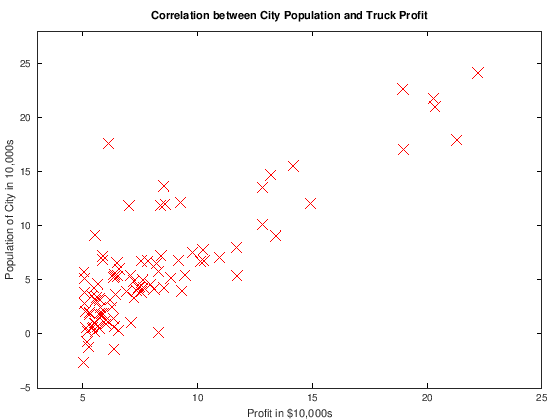

In [9]:
% Plot Data
% Note: You have to complete the code in plotData.m
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;

### computeCost(X, y, theta)

In [10]:
function J = computeCost(X, y, theta)
%COMPUTECOST Compute cost for linear regression
%   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta
%               You should set J to the cost.
predictions = X * theta;
sqrErrors = (predictions-y).^2;
J = 1/(2*m)*sum(sqrErrors);

% =========================================================================

end

In [30]:
%% =================== Part 3: Cost and Gradient descent ===================
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;

In [29]:
% Verificando X e theta
head_X = X(1:10,:)
theta

head_X =

   1.0000   6.1101
   1.0000   5.5277
   1.0000   8.5186
   1.0000   7.0032
   1.0000   5.8598
   1.0000   8.3829
   1.0000   7.4764
   1.0000   8.5781
   1.0000   6.4862
   1.0000   5.0546

theta =

  -3.8788
   1.1913



In [13]:
% Testando função

fprintf('\nTesting the cost function ...\n')
% compute and display initial cost
J = computeCost(X, y, theta);
fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 32.07\n');

% further testing of the cost function
J = computeCost(X, y, [-1 ; 2]);
fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 54.24\n');

fprintf('Program paused. Press enter to continue.\n');
pause;


Testing the cost function ...
With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07

With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24
Program paused. Press enter to continue.
Paused, enter any value to continue


### gradientDescent(X, y, theta, apha, num_iters)

In [41]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters

    % ====================== YOUR CODE HERE ======================
    % Instructions: Perform a single gradient step on the parameter vector
    %               theta. 
    %
    % Hint: While debugging, it can be useful to print out the values
    %       of the cost function (computeCost) and gradient here.
    %
    temp = theta; % Importante para atualização simultânea dos parâmetros
    temp(1) = theta(1) - (alpha/m)*sum((X * theta) - y);
    temp(2) = theta(2) - (alpha/m)*sum(((X * theta) - y) .* X(:, 2));
    theta = temp; % Assim o valor atualizado de um não interfere no outro
    cost_iteration = computeCost(X, y, theta)

    % ============================================================

    % Save the cost J in every iteration    
    J_history(iter) = computeCost(X, y, theta);

end

end

In [15]:
% Testando atualizações dos parâmetros theta através da função do gradiente descendente

% Primeiro passo: (predictions - y)
((X * theta) - y)(1:10)

ans =

  -17.5920
   -9.1302
  -13.6620
  -11.8540
   -6.8233
  -11.8860
   -4.3483
  -12.0000
   -6.5987
   -3.8166



In [16]:
% Segundo passo: somatório
sum((X * theta) - y)

ans = -566.40


In [19]:
% Terceiro passo: learning rate / m
(-alpha/m)*sum((X * theta) - y)

ans =  0.058391


In [21]:
% Quarto passo (somente no caso de theta_1): multiplicação pela derivada parcial de theta_1 (bitwise multiplication)
(-alpha/m)*sum(((X * theta) - y) .* X(:, 2))

ans =  0.65329


In [24]:
% Quinto passo: atualização dos valores (após 1 iteração)
theta
test_theta = theta
test_theta(1) = test_theta(1) - (alpha/m)*sum((X * theta) - y);
test_theta(2) = test_theta(2) - (alpha/m)*sum(((X * theta) - y) .* X(:, 2));
test_theta

theta =

   0
   0

test_theta =

   0
   0

test_theta =

   0.058391
   0.653288



In [42]:
% Inicializando novamente os dados
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;

% Testando função
[theta, J_history] = gradientDescent(X, y, theta, alpha, iterations);

cost_iteration =  6.7372
cost_iteration =  5.9316
cost_iteration =  5.9012
cost_iteration =  5.8952
cost_iteration =  5.8901
cost_iteration =  5.8850
cost_iteration =  5.8799
cost_iteration =  5.8749
cost_iteration =  5.8698
cost_iteration =  5.8648
cost_iteration =  5.8598
cost_iteration =  5.8548
cost_iteration =  5.8499
cost_iteration =  5.8449
cost_iteration =  5.8400
cost_iteration =  5.8351
cost_iteration =  5.8302
cost_iteration =  5.8253
cost_iteration =  5.8205
cost_iteration =  5.8156
cost_iteration =  5.8108
cost_iteration =  5.8060
cost_iteration =  5.8012
cost_iteration =  5.7965
cost_iteration =  5.7917
cost_iteration =  5.7870
cost_iteration =  5.7822
cost_iteration =  5.7775
cost_iteration =  5.7729
cost_iteration =  5.7682
cost_iteration =  5.7635
cost_iteration =  5.7589
cost_iteration =  5.7543
cost_iteration =  5.7497
cost_iteration =  5.7451
cost_iteration =  5.7405
cost_iteration =  5.7360
cost_iteration =  5.7315
cost_iteration =  5.7269
cost_iteration =  5.7224


cost_iteration =  4.9159
cost_iteration =  4.9144
cost_iteration =  4.9128
cost_iteration =  4.9112
cost_iteration =  4.9096
cost_iteration =  4.9081
cost_iteration =  4.9065
cost_iteration =  4.9050
cost_iteration =  4.9034
cost_iteration =  4.9019
cost_iteration =  4.9004
cost_iteration =  4.8989
cost_iteration =  4.8973
cost_iteration =  4.8958
cost_iteration =  4.8943
cost_iteration =  4.8928
cost_iteration =  4.8913
cost_iteration =  4.8898
cost_iteration =  4.8883
cost_iteration =  4.8868
cost_iteration =  4.8854
cost_iteration =  4.8839
cost_iteration =  4.8824
cost_iteration =  4.8810
cost_iteration =  4.8795
cost_iteration =  4.8781
cost_iteration =  4.8766
cost_iteration =  4.8752
cost_iteration =  4.8738
cost_iteration =  4.8723
cost_iteration =  4.8709
cost_iteration =  4.8695
cost_iteration =  4.8681
cost_iteration =  4.8667
cost_iteration =  4.8653
cost_iteration =  4.8639
cost_iteration =  4.8625
cost_iteration =  4.8611
cost_iteration =  4.8597
cost_iteration =  4.8583


cost_iteration =  4.6114
cost_iteration =  4.6109
cost_iteration =  4.6104
cost_iteration =  4.6099
cost_iteration =  4.6094
cost_iteration =  4.6090
cost_iteration =  4.6085
cost_iteration =  4.6080
cost_iteration =  4.6076
cost_iteration =  4.6071
cost_iteration =  4.6066
cost_iteration =  4.6061
cost_iteration =  4.6057
cost_iteration =  4.6052
cost_iteration =  4.6048
cost_iteration =  4.6043
cost_iteration =  4.6038
cost_iteration =  4.6034
cost_iteration =  4.6029
cost_iteration =  4.6025
cost_iteration =  4.6020
cost_iteration =  4.6016
cost_iteration =  4.6011
cost_iteration =  4.6007
cost_iteration =  4.6002
cost_iteration =  4.5998
cost_iteration =  4.5993
cost_iteration =  4.5989
cost_iteration =  4.5985
cost_iteration =  4.5980
cost_iteration =  4.5976
cost_iteration =  4.5972
cost_iteration =  4.5967
cost_iteration =  4.5963
cost_iteration =  4.5959
cost_iteration =  4.5954
cost_iteration =  4.5950
cost_iteration =  4.5946
cost_iteration =  4.5942
cost_iteration =  4.5937


cost_iteration =  4.5181
cost_iteration =  4.5180
cost_iteration =  4.5178
cost_iteration =  4.5177
cost_iteration =  4.5175
cost_iteration =  4.5174
cost_iteration =  4.5172
cost_iteration =  4.5171
cost_iteration =  4.5170
cost_iteration =  4.5168
cost_iteration =  4.5167
cost_iteration =  4.5165
cost_iteration =  4.5164
cost_iteration =  4.5162
cost_iteration =  4.5161
cost_iteration =  4.5160
cost_iteration =  4.5158
cost_iteration =  4.5157
cost_iteration =  4.5155
cost_iteration =  4.5154
cost_iteration =  4.5153
cost_iteration =  4.5151
cost_iteration =  4.5150
cost_iteration =  4.5148
cost_iteration =  4.5147
cost_iteration =  4.5146
cost_iteration =  4.5144
cost_iteration =  4.5143
cost_iteration =  4.5142
cost_iteration =  4.5140
cost_iteration =  4.5139
cost_iteration =  4.5138
cost_iteration =  4.5136
cost_iteration =  4.5135
cost_iteration =  4.5134
cost_iteration =  4.5132
cost_iteration =  4.5131
cost_iteration =  4.5130
cost_iteration =  4.5129
cost_iteration =  4.5127


cost_iteration =  4.4896
cost_iteration =  4.4895
cost_iteration =  4.4895
cost_iteration =  4.4894
cost_iteration =  4.4894
cost_iteration =  4.4893
cost_iteration =  4.4893
cost_iteration =  4.4893
cost_iteration =  4.4892
cost_iteration =  4.4892
cost_iteration =  4.4891
cost_iteration =  4.4891
cost_iteration =  4.4890
cost_iteration =  4.4890
cost_iteration =  4.4890
cost_iteration =  4.4889
cost_iteration =  4.4889
cost_iteration =  4.4888
cost_iteration =  4.4888
cost_iteration =  4.4887
cost_iteration =  4.4887
cost_iteration =  4.4887
cost_iteration =  4.4886
cost_iteration =  4.4886
cost_iteration =  4.4885
cost_iteration =  4.4885
cost_iteration =  4.4884
cost_iteration =  4.4884
cost_iteration =  4.4884
cost_iteration =  4.4883
cost_iteration =  4.4883
cost_iteration =  4.4882
cost_iteration =  4.4882
cost_iteration =  4.4882
cost_iteration =  4.4881
cost_iteration =  4.4881
cost_iteration =  4.4880
cost_iteration =  4.4880
cost_iteration =  4.4880
cost_iteration =  4.4879


In [43]:
% Verificando os valores de theta
theta

theta =

  -3.6303
   1.1664



In [44]:
% Verificando o custo mínimo J_history
min(J_history)

ans =  4.4834
